In [3]:
import numpy as np
import cv2

def he(img):
    image = cv2.imread(img, 0)

    histogram, _ = np.histogram(image.ravel(), 256, [0, 256])
    r = image.shape[0] * image.shape[1]
    D = np.zeros((256,))
    for i in range(256):
        for k in range(0, i + 1):
            D[i] += histogram[k]
        D[i] /= r

    n = 0
    while D[n] <= 0:
        n += 1
    min_D = D[n]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = (D[image[i, j]] - min_D) / (1 - min_D)
            image[i, j] = np.floor(255 * temp)
    return image

In [2]:
from os import listdir
from os.path import isfile, join
from joblib import Parallel, delayed
import multiprocessing
import time
from histogram_1 import *
if __name__ == '__main__':
    try:
        files = [join("Pict20", f) for f in listdir("Pict20") if isfile(join("Pict20", f))]

    except FileNotFoundError:
        print('File not found!')
        exit(0)

   
    
    start_time = time.time()
    
    he_img = Parallel(n_jobs=2)(delayed(he)(i) for i in files)
        
    end_time = time.time()
    
    print(end_time - start_time)

6.07314920425415


In [6]:
from os import listdir
from os.path import isfile, join
from joblib import Parallel, delayed
import multiprocessing
from histogram_1 import *
if __name__ == '__main__':
    try:
        files = [join("Pict20", f) for f in listdir("Pict20") if isfile(join("Pict20", f))]

    except FileNotFoundError:
        print('File not found!')
        exit(0)

   
    
    start_time = time.time()
    
    he_img = Parallel(n_jobs=4)(delayed(he)(i) for i in files)
        
    end_time = time.time()
    
    print(end_time - start_time)
    

3.690429925918579


In [7]:
from os import listdir
from os.path import isfile, join
from joblib import Parallel, delayed
import multiprocessing
from histogram_1 import *
if __name__ == '__main__':
    try:
        files = [join("Pict20", f) for f in listdir("Pict20") if isfile(join("Pict20", f))]

    except FileNotFoundError:
        print('File not found!')
        exit(0)

   
    
    start_time = time.time()
    
    he_img = Parallel(n_jobs=6)(delayed(he)(i) for i in files)
        
    end_time = time.time()
    
    print(end_time - start_time)
    

3.167772054672241


In [5]:
from os import listdir
from os.path import isfile, join
from joblib import Parallel, delayed
import multiprocessing
from histogram_1 import *
if __name__ == '__main__':
    try:
        files = [join("Pict20", f) for f in listdir("Pict20") if isfile(join("Pict20", f))]

    except FileNotFoundError:
        print('File not found!')
        exit(0)

   
    
    start_time = time.time()
    
    he_img = Parallel(n_jobs=8)(delayed(he)(i) for i in files)
        
    end_time = time.time()
    
    print(end_time - start_time)

2.725414991378784


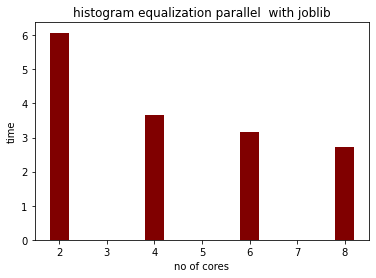

In [8]:
import numpy as np
import matplotlib.pyplot as plt
lst=[6.07314920425415,3.67317795753479,3.167772054672241,2.725414991378784]
n_of_c=[2,4,6,8]
plt.bar(n_of_c,lst, color ='maroon',
        width = 0.4)
 
plt.xlabel("no of cores")
plt.ylabel("time")
plt.title("histogram equalization parallel  with joblib")
plt.show()